Code to achieve a completely uncorrelated distribution of the parameters on the chip.
There are 16 (25) resonators in total
In our case the parameters are (all lengths in microns):
1. frequency (inverse length), evenly spaced from 5-11 GHz
2. w
3. s
4. location on the chip, enumerated 1-25


In [2]:
!pip install pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import time

In [30]:
p = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] #position
f= np.linspace(6.7, 7.7, 20) #frequency in GHz
JJs = [(100, 255.9062328),
       [118.4210526, 263.6504233],
       [136.8421053, 272.4220288],
       [155.2631579, 282.125235],
       [173.6842105, 292.6673965],
       [192.1052632, 303.9612346],
       [210.5263158, 315.9261459],
       [228.9473684, 328.4888088],
       [247.3684211, 341.5832779],
       [265.7894737, 355.1507346],
       [284.2105263, 369.1390297],
       [302.6315789, 383.5021155],
       [321.0526316, 398.1994378],
       [339.4736842, 413.1953319],
       [357.8947368, 428.4584492],
       [376.3157895, 443.9612296],
       [394.7368421, 459.6794258],
       [413.1578947, 475.5916799],
       [431.5789474, 491.6791513],
       [450, 507.9251913]]

    
print('position array: ', p)
print('frequency array: ', f)
print('JJs array: ', JJs)

position array:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
frequency array:  [6.7        6.75263158 6.80526316 6.85789474 6.91052632 6.96315789
 7.01578947 7.06842105 7.12105263 7.17368421 7.22631579 7.27894737
 7.33157895 7.38421053 7.43684211 7.48947368 7.54210526 7.59473684
 7.64736842 7.7       ]
JJs array:  [(100, 255.9062328), [118.4210526, 263.6504233], [136.8421053, 272.4220288], [155.2631579, 282.125235], [173.6842105, 292.6673965], [192.1052632, 303.9612346], [210.5263158, 315.9261459], [228.9473684, 328.4888088], [247.3684211, 341.5832779], [265.7894737, 355.1507346], [284.2105263, 369.1390297], [302.6315789, 383.5021155], [321.0526316, 398.1994378], [339.4736842, 413.1953319], [357.8947368, 428.4584492], [376.3157895, 443.9612296], [394.7368421, 459.6794258], [413.1578947, 475.5916799], [431.5789474, 491.6791513], [450, 507.9251913]]


JJ data:  [[210.5263158, 315.9261459], [394.7368421, 459.6794258], [321.0526316, 398.1994378], [450, 507.9251913], [155.2631579, 282.125235], [357.8947368, 428.4584492], [118.4210526, 263.6504233], [173.6842105, 292.6673965], [376.3157895, 443.9612296], [136.8421053, 272.4220288], [228.9473684, 328.4888088], [431.5789474, 491.6791513], [265.7894737, 355.1507346], [247.3684211, 341.5832779], [192.1052632, 303.9612346], (100, 255.9062328), [302.6315789, 383.5021155], [284.2105263, 369.1390297], [413.1578947, 475.5916799], [339.4736842, 413.1953319]]
Correlation coefficient 0.01503759386413387
       0         1           2           3
0    1.0  7.121053  210.526316  315.926146
1    2.0  6.805263  394.736842  459.679426
2    3.0  7.278947  321.052632  398.199438
3    4.0  7.226316  450.000000  507.925191
4    5.0  7.173684  155.263158  282.125235
5    6.0  7.700000  357.894737  428.458449
6    7.0  7.331579  118.421053  263.650423
7    8.0  7.594737  173.684211  292.667396
8    9.0  7.489

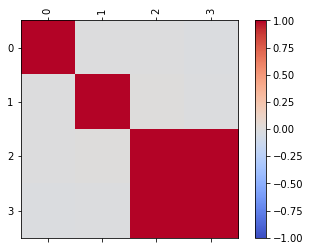

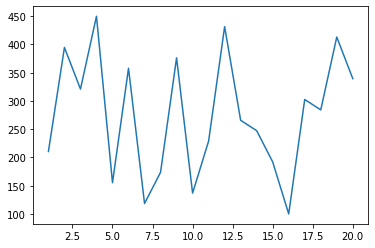

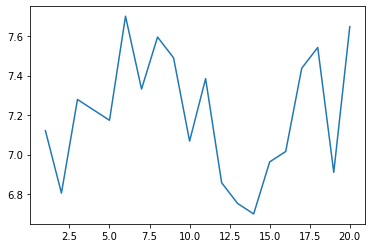

In [33]:
#start = time.time()
cc=10
while cc > 0.5: #loop that ensures that the sum of all correlation coefficients is small
    data = np.zeros((20,4))
    data[:,0] = p
    rd.shuffle(f) 
    data[:,1] = f
    
    rd.shuffle(JJs)
    
    JJs_0 = []
    JJs_1 = []
    for i in range(len(p)):
        JJs_0.append(JJs[i][0])
        JJs_1.append(JJs[i][1])
    data[:,2] = JJs_0
    data[:,3] = JJs_1

 
    df = pd.DataFrame(data)
    corr = df.corr()
    cc=0
    for i in range(3):
        for j in range(0, i):
            if i != j:
                if abs(corr.iloc[i,j]) > 0.01: #makes sure that no individual correlation is large 
                    cc = 10
                    break
                else:
                    cc += abs(corr.iloc[i,j])
                    
print('JJ data: ', JJs)
#end = time.time()
#print("Running time", end - start)
print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

plt.figure()
plt.plot(p, JJs_0)
plt.figure()
plt.plot(p, f)

In [38]:
import xlsxwriter
workbook = xlsxwriter.Workbook('excelFile.xlsx')
worksheet = workbook.add_worksheet()
col = 0

for row, dat in enumerate(data):
    worksheet.write_row(row, col, dat)

workbook.close()

The following cell contains the code that uncorrelates the parameters not only linearly but also quadratically! It checks whether the average correlation is below some value. Furthermore it checks whether all individual correlations are below a certain value.

In [ ]:
cc=100
while cc > 10:
    data = np.zeros((25,8))

    data[:,0] = p
    data[:,4] = np.square(p)

    rd.shuffle(f)
    data[:,1] = f
    data[:,5] = np.square(f)
    
    rd.shuffle(w_full)
    data[:,2] = w_full
    data[:,6] = np.square(w_full)

    rd.shuffle(s_full)
    data[:,3] = s_full
    data[:,7] = np.square(s_full)
    
    #check whether every resonator would have a different combination of w+2s and w/s
    checked = True
    for i in range(25):
        for j in range(25):
            if i != j:
                if data[i,2] == data[j,2] and data[i,3] == data[j,3]:
                    checked = False
                    break
    if checked == True:   
        df = pd.DataFrame(data)
        corr = df.corr()
        cc=0
        for i in range(0,len(data[0])):
            for j in range(0,i):
                if i != j and i+5 != j and i != j+5:
                    if abs(corr.iloc[i,j]) > 0.2: #makes sure that no individual correlation is large 
                        cc = 100
                        break
                    else:
                        cc += abs(corr.iloc[i,j])
    else:
        continue

print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

The script below gives a different importance to the linear-linear correlations of the parameters, and the linear-quadratic, quadratic-quadratic correlations.

In [ ]:
start = time.time()
cc = False
data = np.zeros((25,8))
while cc == False:
    rd.shuffle(w_full)
    data[:,2] = w_full
    
    rd.shuffle(s_full)
    data[:,3] = s_full
        
    #check whether every resonator would have a different combination of w+2s and w/s
    checked = True
    for i in range(25):
        for j in range(25):
            if i != j:
                if data[i,2] == data[j,2] and data[i,3] == data[j,3]:
                    checked = False
                    break
    
    data[:,6] = np.square(w_full)
    data[:,7] = np.square(s_full)
    data[:,0] = p
    data[:,4] = np.square(p)

    rd.shuffle(f)
    data[:,1] = f
    data[:,5] = np.square(f)

                
    if checked == True:
        df = pd.DataFrame(data)
        corr = df.corr()
        cc = True
        for i in range(0,len(data[0])):
            for j in range(0, i-1):
                if i != j and i+5 != j and i != j+5: #we don't care about the diagnoal autocorrelations.
                    if i <= 4 and j <= 4:
                        if abs(corr.iloc[i,j]) > 0.15:
                            cc = False 
                            break
                    else:
                        if abs(corr.iloc[i,j]) > 0.25: #makes sure that no individual correlation is large 
                            cc = False
                            break
    else:
        continue

end = time.time()
print("Running time", end - start, "seconds")
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()